# LAT Workshop Tutorial #1: Sensitivity Curves, SNR, Inner Products, Likelihoods

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lisatools.utils.constants import *
from copy import deepcopy  # can be useful

In the first tutorial, we will learn how to use `lisatools` to generate sensitivity curves for LISA. With this information, we will then compute inner products, signal-to-noise ratios (SNR), and Likelihoods for a basic set of sources. 
在第一个指导手册中，我们将学习如何使用“lisatools”来生成LISA的灵敏度曲线。通过它我们将对一系列基础的信号来源，计算其内积、信噪比以及是引力波信号的可能性。

## Task 1: Plotting and comparing sensitivity curves.

Calculate and plot the **sky-averaged** LISA sensitivity function ([LISASens](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.LISASens)) in the characteristic strain representation. Compare the **model** used for the LDC2A (or Sangria) dataset to the Science Requirements Document version for the sensitivity curves (`scirdv1`).
计算并且作出天区各向同性的在特征应变表示下的LISA灵敏度函数，把用于LDC2A（或 Sangria）数据库与科学要求文档版本下模型的灵敏度曲线进行比较。
Useful documentation:有用的文档
* [get_available_default_lisa_models](https://mikekatz04.github.io/LISAanalysistools/build/html/user/main.html#lisatools.detector.get_available_default_lisa_models)
* [get_stock_sensitivity_options](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.get_stock_sensitivity_options)
* [get_sensitivity](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.get_sensitivity)
* [LISASens](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.LISASens)

In [23]:
# useful imports
from lisatools.sensitivity import LISASens, get_sensitivity, get_stock_sensitivity_options
import lisatools.detector as lisa_models

In [24]:
get_stock_sensitivity_options()

['X1TDISens',
 'Y1TDISens',
 'Z1TDISens',
 'XY1TDISens',
 'YZ1TDISens',
 'ZX1TDISens',
 'A1TDISens',
 'E1TDISens',
 'T1TDISens',
 'X2TDISens',
 'Y2TDISens',
 'Z2TDISens',
 'LISASens',
 'CornishLISASens',
 'FlatPSDFunction']

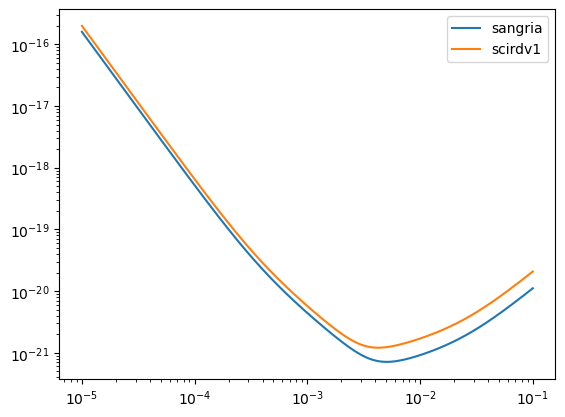

In [25]:
f = np.logspace(-5, -1, 10000)
Sn = get_sensitivity(f, sens_fn=LISASens, average=True, model=lisa_models.sangria, return_type='char_strain')

plt.loglog(f, Sn, label="sangria")

Sn = get_sensitivity(f, sens_fn=LISASens, average=True, model=lisa_models.scirdv1, return_type='char_strain')

plt.loglog(f, Sn, label="scirdv1")
plt.legend()

### Question 1

How do you expect the difference in sensitivity curve models to affect LISA observations? Consider what higher noise at lower or high frequencies will do to our different source classes. 你是如何估计不同灵敏度曲线模型对LISA观测影响的差异的？考虑低频或高频下的高噪声将会对我们不同来源级别产生什么影响。

### Question 2

We have asked you to compute the sky-averaged sensitivity curves. What does that mean? Can you determine, without looking at the documentation what the total sky-averaging factor is?
我们已经让你去计算天区平均灵敏度曲线了，这是为了干什么？在没有看文档的情况下你能想到完整的天区平均项是多少？

In [26]:
Sn_averaged = get_sensitivity(f, sens_fn=LISASens, model=lisa_models.sangria, average=True, return_type="char_strain")
Sn = get_sensitivity(f, sens_fn=LISASens, model=lisa_models.sangria, average=False, return_type="char_strain")

print(Sn_averaged / Sn)

[2.5819889 2.5819889 2.5819889 ... 2.5819889 2.5819889 2.5819889]


Now we are going to put our sensitivity information into a [SensitivityMatrix](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.SensitivityMatrix). Build a two-channel (with no cross-channels) sensitivity matrix where both channels' sensitivity are governed by the [LISASens](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.LISASens) sensitivituy function.现在我们要把我们的灵敏度信息输入灵敏度矩阵中，建立一个双通道（非正交）的灵敏度矩阵其中两个通道的灵敏度被LISASens灵敏度函数所决定。


Useful documentation:
* [SensitivityMatrix](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.SensitivityMatrix)

We will add one extra useful piece of information into here: an estimated Galactic foreground noise to include in the sensitivity. This is important when performing LISA data analysis.我们将把添加另一组有用的信息到里面：一个可估计的银河系前景噪声使其包含到灵敏度的测算中，这对于开展LISA数据分析是很重要的。

The default foreground function is [](). It takes one parameter: observation time in seconds. Use the documentation of the sensitivity function and the stochastic function to determine how to pass this information with the abstracted setup in `lisatools`. 

默认的前景函数是FittedHyperbolicTangentGalaticForeground，需要一个参数：每秒观察时间。用文档中的灵敏度函数和随机函数来考虑怎么通过Lisa tools中简单的设置递信息。
Useful documentation:
* [LISASens](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.LISASens)
* [FittedHyperbolicTangentGalacticForeground](https://mikekatz04.github.io/LISAanalysistools/build/html/user/stochastic.html#lisatools.stochastic.FittedHyperbolicTangentGalacticForeground)

In [31]:
# imports
from lisatools.sensitivity import SensitivityMatrix, LISASens, A1TDISens

In [32]:
sens_kwargs = dict(
    stochastic_params=(1.0 * YRSID_SI,)
)

sens_mat = SensitivityMatrix(f, [A1TDISens, A1TDISens], **sens_kwargs)

Plot it with the [loglog](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.SensitivityMatrix.loglog) method of the matrix.通过矩阵的loglog方法绘图

(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

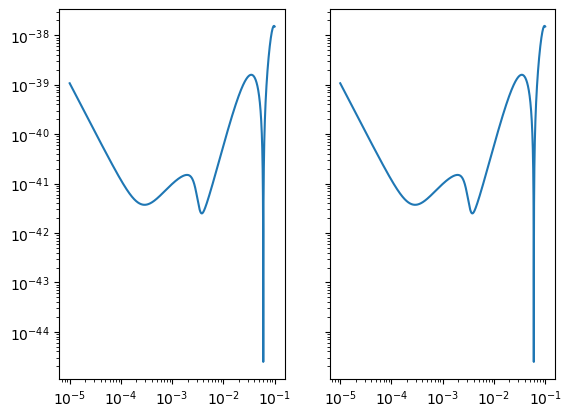

In [33]:
sens_mat.loglog()

Compare the noise curve with and without foreground confusion noise. And then compare the foreground noise at two different values of the observation time. 比较有无前景混乱噪声下的噪声曲线，之后比较在不同观测时间下的前景噪声。

Useful documentation:
* [update_stochastic](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.SensitivityMatrix.update_stochastic)

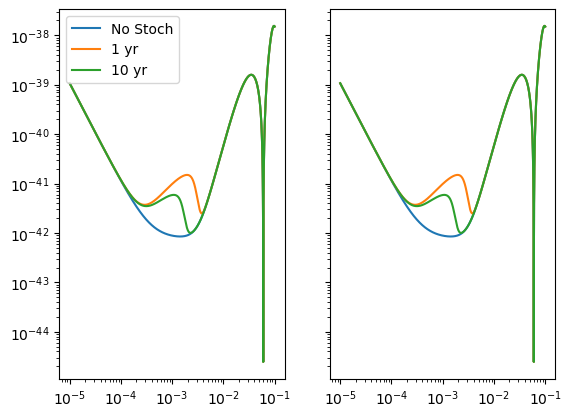

In [38]:
sens_mat_no_confusion = deepcopy(sens_mat)
sens_mat_no_confusion.update_stochastic(stochastic_params=None)

sens_mat_1_yr = deepcopy(sens_mat)
sens_mat_1_yr.update_stochastic(stochastic_params=(1 * YRSID_SI,))

sens_mat_10_yr = deepcopy(sens_mat)
sens_mat_10_yr.update_stochastic(stochastic_params=(10* YRSID_SI,))

fig, ax = sens_mat_no_confusion.loglog(label="No Stoch")

sens_mat_1_yr.loglog(fig=fig, ax=ax, label="1 yr")
sens_mat_10_yr.loglog(fig=fig, ax=ax, label="10 yr")
ax[0].legend()

### Question

Why does the foreground confusion change over time? What are the broader implications of this on our analysis?为什么前景混合噪声会随着时间变化？这对我们的研究有什么广泛的影响？

### Task 2: Build a DataResArray to house and plot data information.

We are going to build a sinusoidal signal for us to do some computations with. We will store it in a [DataResArray](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.datacontainer.DataResidualArray). Build a sinusoidal signal with 4 parameters: $A$ (amplitude), $f_0$ (frequency), $\dot{f}_0$ (frequency derivative), and $\phi_0$ (initial phase):我们会构建一个正弦信号来做一些计算之后把它存在DataResidualArray中，这个信号有4个参数：振幅、频率、频率导数、初相位。

$$ h_1(t) = A\sin{\left(2\pi (f_0 t + \frac{1}{2}\dot{f}_0t^2) + \phi_0\right)} $$
$$ h_2(t) = A\cos{\left(2\pi (f_0 t + \frac{1}{2}\dot{f}_0t^2) + \phi_0\right)} $$

Pick your parameters. Use a reasonable timestep ($\sim10$s) and observation time ($\sim$yr) for LISA. Plot $h_1$ and $h_2$. 选择合适的参数，相对于LISA使用合理的时间步长和观测时间，作出h1和h2信号。

In [39]:
dt = 10.0
Tobs = YRSID_SI
Nobs = int(Tobs / dt)
t = np.arange(Nobs) * dt

(31556130.0, 31558130.0)

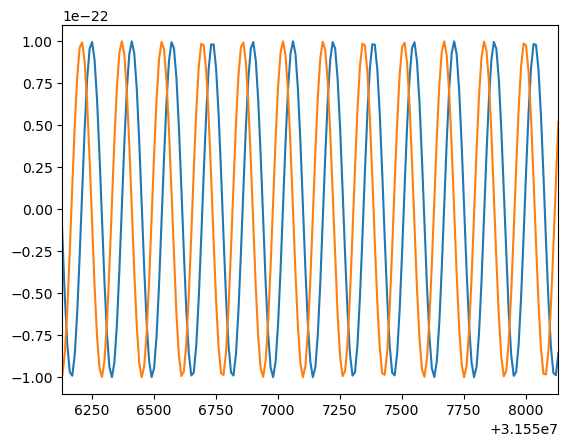

In [40]:
A = 1e-22
f0 = 3e-3
fdot = 1e-10
phi0 = 4.2

h1 = A * np.sin(2 * np.pi * (f0 * t + 1/2 * fdot * t ** 2) + phi0)
h2 = A * np.cos(2 * np.pi * (f0 * t + 1/2 * fdot * t ** 2) + phi0)
plt.plot(t, h1, label="h1")
plt.plot(t, h2, label="h2")
plt.xlim(t[-1] - 2000.0, t[-1])

Now we will add our two channels (h1, h2) into a `DataResArray`. 
现在添加双通道（h1,h2）到一个数据集中
Useful Documentation:
* [DataResidualArray](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.datacontainer.DataResidualArray)

In [41]:
# useful imports
from lisatools.datacontainer import DataResidualArray

In [42]:
data_res_arr = DataResidualArray([h1, h2], dt=dt)

/home/ouyang/anaconda3/lib/python3.12/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


Plot the signals with the data residual array plotting functions.
用数据残差数组绘图函数绘图
Useful documentation:
* [loglog](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.datacontainer.DataResidualArray.loglog)

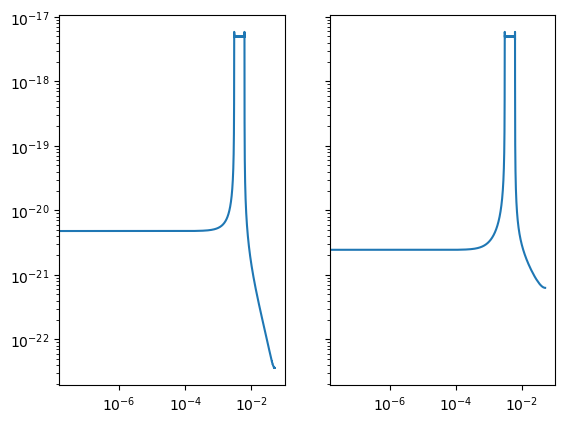

In [43]:
fig, ax = data_res_arr.loglog()

### Question 3

When you put in the time-domain signal from above, the `DataResidualArray` class transforms it under the hood. Looking at the output from above, what transform did it do?
当你从前端输入时域信号，`DataResidualArray`类会在底端进行变换，观察输出结果，它做了什么变换？
Let's take the FFT of our input time-domain dataset with numpy (`np.fft.rfft`) and add this to the above plot. 让我们利用numpy对输入的时域数据集做快速傅里叶变换并将其添加到上面的图中

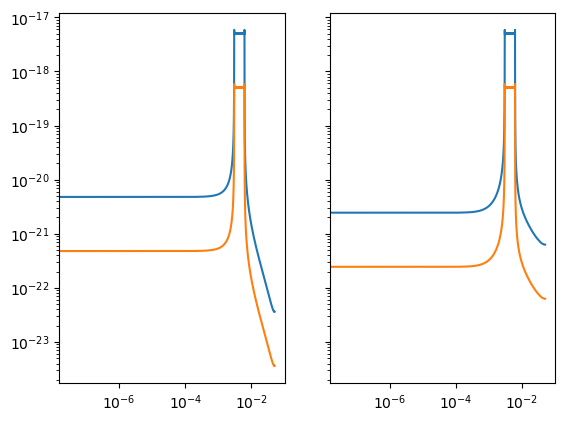

In [44]:
fig, ax = data_res_arr.loglog()
h1_f = np.abs(np.fft.rfft(h1))
h2_f = np.abs(np.fft.rfft(h2))
ax[0].loglog(data_res_arr.f_arr, h1_f)
ax[1].loglog(data_res_arr.f_arr, h2_f)

What is the factor difference between the FFT we did and the frequency-domain spectra stored in our `DataResidualArray`? Where does this term come frome and why is it there? (this is a small detail that is always easy to forget)这两种结果的差异是什么？

In [49]:
np.abs(data_res_arr[0]) / h2_f


array([19.57651385, 19.57651309, 19.5765127 , ...,  0.57449832,
        0.57449802,  0.5744974 ])

In [50]:
np.abs(data_res_arr[0]) / h1_f

array([10., 10., 10., ..., 10., 10., 10.])

## Task 3: Combine into an `AnalysisContainer`.

Now we will use our data and sensitivity information and combine it into an [AnalysisContainer](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#analysis-container) object. This object helps streamline the analysis by working under the hood properly with different data and sensitivity matrices.

Plot the new setup with both the data and sensitivity information. We will do computations with this object a little later. 现在我们将使用我们的数据和敏感度信息并将其组合到 AnalysisContainer中。该对象通过使用不同的数据和灵敏度矩阵在后台正确工作，有助于简化分析。使用数据和灵敏度信息绘制新数据集。对该对象进行计算。

Helpful documentation:
* [AnalysisContainer](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#analysis-container)
* [AnalysisContainer.loglog](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.loglog)

In [51]:
from lisatools.analysiscontainer import AnalysisContainer

In [52]:
analysis = AnalysisContainer(data_res_arr, sens_mat)

/home/ouyang/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ouyang/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(1e-24, 1e-19)

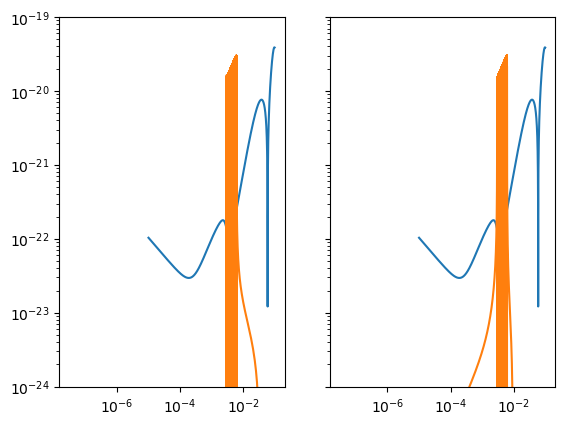

In [53]:
fig, ax = analysis.loglog()
ax[0].set_ylim(1e-24, 1e-19)

## Task 4: Compute the inner product.

Now we will inject a signal into the data and calculate the inner product of another signal with that data. We will take `data_res_arr` as the data input. 计算两个信号的内积，`data_res_arr`作为数据输入

Generate a new signal witih a slightly different set of parameters from the injection you chose above. 生成一个新的信号，参数与上面的有细微不一致

In [54]:
A_new = A # 1.01e-22
f0_new = f0 # 3.0000003e-3
fdot_new = fdot * (1.000001)
phi0_new = phi0  # 3.1

In [56]:
h1_new = A_new * np.sin(2 * np.pi * (f0_new * t + 1/2 * fdot_new * t ** 2) + phi0_new)
h2_new = A_new * np.cos(2 * np.pi * (f0_new * t + 1/2 * fdot_new * t ** 2) + phi0_new)

### Question:

What is the inner product value of your new signal with the injected data? With numpy calculate the inner product using this equation:
内积计算公式
$$ \langle h_1 | h_2 \rangle = 4 \text{Re} \int_{f_\text{min}}^{f_\text{max}}\frac{\tilde{h}_1(f)^*\tilde{h}_2(f)}{S_n(f)}df \ \ .$$


In [57]:
template = DataResidualArray([h1_new, h2_new], dt=dt)
sens_mat.update_frequency_arr(template.f_arr)
hold_hnew = 4 * template.df * np.real(np.sum(template[:, 1:].conj() * data_res_arr[:, 1:] / sens_mat[:, 1:]))
print(hold_hnew)

/home/ouyang/anaconda3/lib/python3.12/site-packages/lisatools/sensitivity.py:83: RuntimeWarning: divide by zero encountered in divide
  Sa_a = Sa_a_in * (1.0 + (0.4e-3 / frq) ** 2) * (1.0 + (frq / 8e-3) ** 4)
/home/ouyang/anaconda3/lib/python3.12/site-packages/lisatools/sensitivity.py:85: RuntimeWarning: divide by zero encountered in power
  Sa_d = Sa_a * (2.0 * np.pi * frq) ** (-4.0)
/home/ouyang/anaconda3/lib/python3.12/site-packages/lisatools/sensitivity.py:87: RuntimeWarning: invalid value encountered in multiply
  Sa_nu = Sa_d * (2.0 * np.pi * frq / C_SI) ** 2
/home/ouyang/anaconda3/lib/python3.12/site-packages/lisatools/sensitivity.py:92: RuntimeWarning: divide by zero encountered in divide
  Soms_d = Soms_d_in * (1.0 + (2.0e-3 / f) ** 4)
/home/ouyang/anaconda3/lib/python3.12/site-packages/lisatools/sensitivity.py:94: RuntimeWarning: invalid value encountered in multiply
  Soms_nu = Soms_d * (2.0 * np.pi * frq / C_SI) ** 2
/home/ouyang/anaconda3/lib/python3.12/site-packages/lisat

157265.40056575966


Now, calculate the inner product using the [inner_product](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.inner_product) method in the `AnalysisContainer` class. 利用类中的函数计算内积

In [58]:
analysis.template_inner_product(template)

157265.4005657595

The numbers may not match exactly. Under the hood, the inner product function in `lisatools` uses `np.trapz`. If you do a sum, you may get a very small and negligible difference. 两个数据表示完全一致的，底端lisatools用的是trapz，所以会有差异，如果求和的话也会有差异，但比较微小可以忽略

Play around with the parameters you chose above. Try to understand how the inner product changes with the parameters you choose (i.e. how far they are from the injection parameters). 试着改变一下参数看一下内积的值随参数是怎么变化的

## Task 5: Compute the signal-to-noise ratio.

There are two signal-to-noise ratios (SNR) that are of interest to LISA folks. One is the optimal SNR ($\rho_\text{opt}$) of a template. This is the maximal SNR a template can possible achieve with a given noise profile ($h$ is the template):有两个信躁比比较重要，第一个是opt，对于给定噪声模型，数据模版所满足的最大信噪比
$$ \rho_\text{opt} = \sqrt{\langle h | h \rangle}\ \ .  $$
In other words, if the injection data is exactly equivalent to the template, it will achieve this SNR. 也就是输入的数据刚好符合模版的时候

Another SNR of interest is the detected snr ($\rho_\text{det}$). It is given by,另一个信噪比是探测到的信噪比
$$ \rho_\text{det} = \frac{\langle d | h \rangle}{\sqrt{\langle h | h \rangle}} = \frac{\langle d | h \rangle}{\rho_\text{opt}}\ \ .  $$

Above, you calcualted $\langle d | h \rangle$, now calculate $\langle h | h \rangle$ with numpy array operations and compute the optimal and detected SNR.运用numpy可以计算这两个信噪比

In [59]:
hnew_hnew = 4 * template.df * np.real(np.sum(template[:, 1:].conj() * template[:, 1:] / sens_mat[:, 1:]))
print(hnew_hnew)
print(f"Opt SNR: {np.sqrt(hnew_hnew)}, Det SNR: {hold_hnew / np.sqrt(hnew_hnew)}")

158169.98904394475
Opt SNR: 397.70590773075617, Det SNR: 395.4313916609635


To compute these values with the `AnalysisContainer` object, use the [template_snr](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.template_snr) method.也可以利用AnalysisContainer来计算

In [60]:
opt_snr, det_snr = analysis.template_snr(template)
print(f"Opt SNR: {opt_snr}, Det SNR: {det_snr}")

Opt SNR: 397.70590773075594, Det SNR: 395.43139166096336


### Question

How does changing the parameters of your template affect the optimal SNR and the detected SNR?模版参数的改变是如何影响到这两个信噪比的？


## Task 6: Compute the Likelihood. 

The Likelihood used in LISA (and other areas of GWs) is a Gaussian likelihood that replaces the typical $\frac{x - \mu}{\sigma}$ term with the noise-weighted inner product of the residual data with itself: $\langle \vec{d} - \vec{h} | \vec{d} - \vec{h} \rangle$. Let's break that down. 
LISA用的是高斯可能性其中$\frac{x - \mu}{\sigma}$用残差与自身的加权内积来替代
1) What do we mean when we say residual? It is the difference between the data and the template. 我们说残差的时候是指什么？数据和模版的不同在于？

$$ \vec{r} = \vec{d} - \vec{h} $$

Calculate the residual of the data and the template and store it in a new `DataResidualArray`.计算数据和模版的残差存到数组中

In [61]:
r1 = h1_new - h1
r2 = h2_new - h2

residual = DataResidualArray([r1, r2], dt=dt)

2) Calculate the inner product of the residual with itself. Hint: You can put it in a new `AnalysisContainer` and calculate it directly with that. 计算内积，可以用AC中的函数直接算

In [65]:
analysis_res = AnalysisContainer(residual, sens_mat)
print(analysis_res.inner_product())

1809.3808500887073


3) Build the full Likelihood. The Gaussian likelihood is given by,
$$ \mathcal{L} = e^{-\frac{1}{2}\langle \vec{d} - \vec{h} | \vec{d} - \vec{h} \rangle} \ \ . $$给出高斯可能性

We usually work with the natural log of the Likelihood:取对数
$$ \ln{\mathcal{L}} = -\frac{1}{2}\langle \vec{d} - \vec{h} | \vec{d} - \vec{h} \rangle \ \ . $$

With this in mind. Take your inner product value from above and calculate the Likelihood of this template. 进行计算

In [66]:
likelihood = -1/2 * analysis_res.inner_product()
print(f"Likelihoood: {likelihood}")

Likelihoood: -904.6904250443537


We can also break apart the inner product into usual pieces because the inner product is a linear operation:
$$ \ln{\mathcal{L}} = -\frac{1}{2}\left(\langle \vec{d} | \vec{d}\rangle + \langle \vec{h} | \vec{h}\rangle - 2 \langle \vec{d} | \vec{h}\rangle\right) \ \ . $$

You should see some familiar terms emerging:
* $\langle \vec{h} | \vec{h}\rangle = \rho_\text{opt}^2$
* $\langle \vec{d} | \vec{h}\rangle \sim \rho_\text{det} * \rho_\text{opt}$ (when phase maximized)
* $\langle \vec{d} | \vec{d}\rangle$ is the inner product of the data with itself. In MCMC analysis generally, the $\langle \vec{d} | \vec{d}\rangle$ term will remain constant throughout sampling.

You can calculate the Likelihood of a template against the data using the [template_likelihood](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.template_likelihood) method in the `AnalysisContainer` class. 同样对上一个cell作一下分解我们可以得知几个项的具体含义，可以通过类中函数直接计算

In [67]:
analysis.template_likelihood(template)

-904.6904250442749

### Question:


How does changing the parameters effect the Likelihood? How does that relate the optimal and detected SNR values? There are two interesting keyword arguments in the [template_likelihood](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.template_snr) method: `include_psd_info` and `phase_maximize`. The `phase_maximize` argument can be found for both the Likelihood and SNR computations. Reading the documentation and adding those keyword arguments in, can you figure out what they are doing with these calculations?更改参数如何影响可能性？这与两个信噪比有什么关联？ template_likelihood 方法中有两个有趣的关键字参数：include_psd_info 和phase_maximize。 Phase_maximize 参数可用于似然度和 SNR 计算。阅读文档并添加这些关键字参数，弄清楚对这些计算做了什么。

## Task 7: Add a signal model. 

Now we will add a signal model to our Likelihood class. You can either set it as a keyword argument when instantiating the `AnalysisContainer`. Or you can just set it as an attribute after the fact. 

But first, we need to turn our sinusoidal signal into a function. Build a function that takes our four parameters ($A$, $f_0$, $\dot{f}_0$, and $\phi_0$) and returns a list of `[h1, h2]`. Add the time array as an argument to your generator. So it should have a signature like: `sinusoidal_waveform(A: float, f0: float, fdot0: float, phi0: float, t_arr: np.ndarray)`现在往likelihood 类添加一个信号模型，可以在实例化 AnalysisContainer 时将其设置为关键字参数。或者可以设置为属性。
但首先，将正弦信号转换为函数。构建一个采用四个参数的函数并返回`[h1, h2]`列表。将时间数组作为参数添加到生成器中。所以应该有一个这样的声明sinusoidal_waveform(A: float, f0: float, fdot0: float, phi0: float, t_arr: np.ndarray)

In [68]:
def sinusoidal_waveform(A: float, f0: float, fdot: float, phi0: float, t: np.ndarray, **kwargs) -> [np.ndarray, np.ndarray]:
    h1 = A * np.sin(2 * np.pi * (f0 * t + 1/2 * fdot * t ** 2) + phi0)
    h2 = A * np.cos(2 * np.pi * (f0 * t + 1/2 * fdot * t ** 2) + phi0)
    return [h1, h2]

Now add the signal model to our Likelihood class by updating the `signal_gen` attribute. 更新进行添加属性

In [69]:
analysis.signal_gen = sinusoidal_waveform

Calculate the Likelihood with a new set of parameters. Remember to add `t` as a last argument to your inputs.试一下用新的一组参数来计算可能性，别忘了最后一个参数't'

Helpful documentation:
* [AnalysisContainer.calculate_signal_likelihood](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.calculate_signal_likelihood)

In [70]:
analysis.calculate_signal_likelihood(A*1.01, f0*1.00, fdot, phi0, t, source_only=True)

/home/ouyang/anaconda3/lib/python3.12/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


-7.908509646949824

整体上了解了GW信号的基本要处理哪些数据和计算哪些数据以及如何进行modeling的，但编写代码的能力不够，只能看着tutorials来

## Extra practice

 Now repeat various parts of the tutorial adjusting the signal or the sensitivity model. Observe how that changes the inner product, SNR, and Likelihood. Having an understanding of these elements is crucial to LISA data analysis!